# Netflix Data Analysis

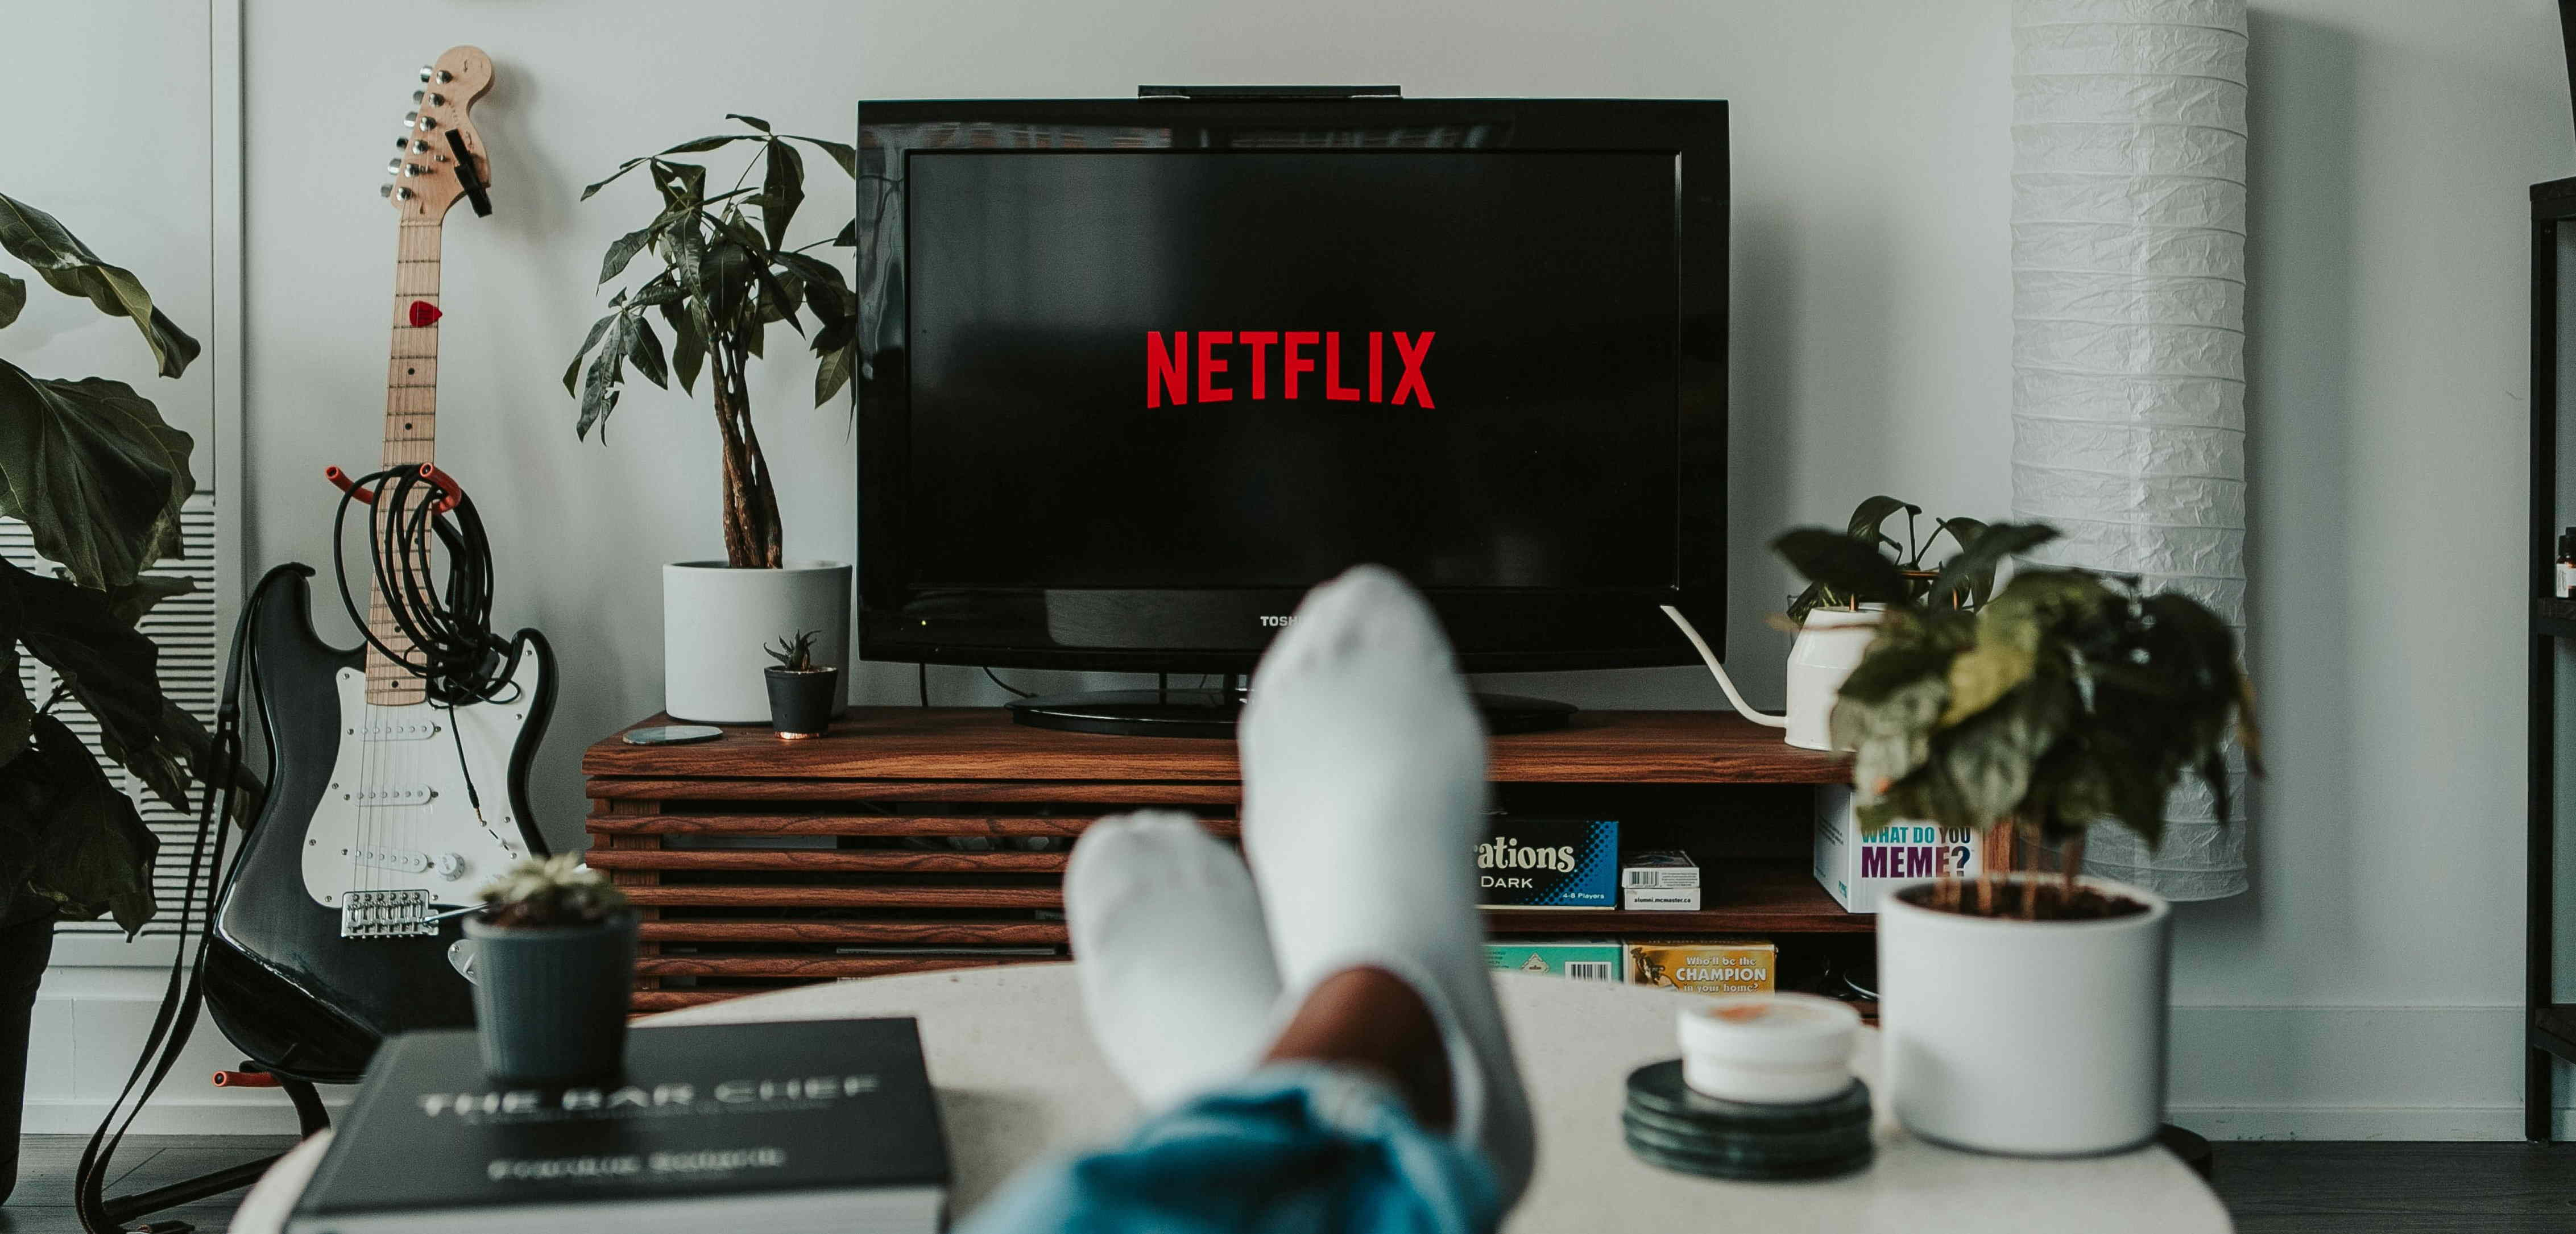

###Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Loading your friend's data into a dictionary

In [3]:
# Create the years and durations lists
years = []
for i in range(2011,2021):
    years.append(i)
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93,90]

# Create a dictionary with the two lists
movie_dict = {"years":years,"durations":durations}

# Print the dictionary
print(movie_dict)

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}


## 2. Creating a DataFrame from a dictionary

In [4]:
# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Print the DataFrame
print(durations_df)

   years  durations
0   2011        103
1   2012        101
2   2013         99
3   2014        100
4   2015        100
5   2016         95
6   2017         95
7   2018         96
8   2019         93
9   2020         90


## 3. A visual inspection of our data

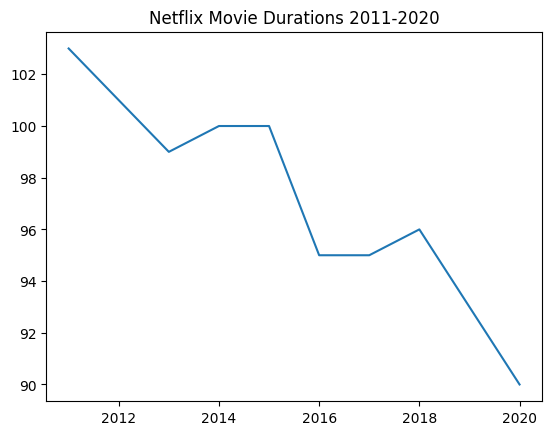

In [5]:
fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(years,durations)

# Create a title
plt.title("Netflix Movie Durations 2011-2020")

# Show the plot
plt.show()

##4. Loading the rest of the data from a CSV


In [7]:
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

# Print the first five rows of the DataFrame
print(netflix_df[:10])

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   
5      s6  TV Show     46        Serdar Akar   
6      s7    Movie    122    Yasir Al Yasiri   
7      s8    Movie    187     Kevin Reynolds   
8      s9    Movie    706      Shravan Kumar   
9     s10    Movie   1920       Vikram Bhatt   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Bi

##5. Filtering for movies!


In [8]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df.type == "Movie"]

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[["title","country","genre","release_year","duration"]]

# Print the first five rows of the new DataFrame
print(netflix_movies_col_subset[:10])

    title        country          genre  release_year  duration
1    7:19         Mexico         Dramas          2016        93
2   23:59      Singapore  Horror Movies          2011        78
3       9  United States         Action          2009        80
4      21  United States         Dramas          2008       123
6     122          Egypt  Horror Movies          2019        95
7     187  United States         Dramas          1997       119
8     706          India  Horror Movies          2019       118
9    1920          India  Horror Movies          2008       143
10   1922  United States         Dramas          2017       103
13  2,215       Thailand  Documentaries          2018        89


In [9]:
netflix_df_movies_only.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


##6. Creating a scatter plot


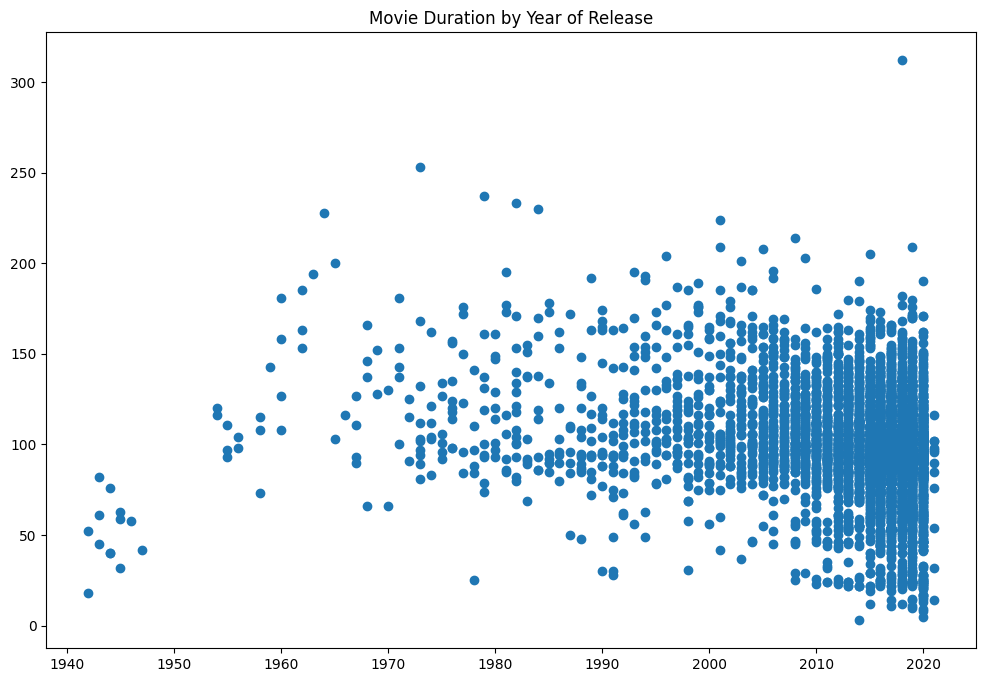

In [10]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset.release_year,netflix_movies_col_subset.duration)

# Create a title
plt.title("Movie Duration by Year of Release")

# Show the plot
plt.show()

##7. Digging deeper


In [11]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration'] < 60]

# Print the first 20 rows of short_movies
print(short_movies[:20])

                                                 title         country  \
35                                           #Rucker50   United States   
55                 100 Things to do Before High School   United States   
67   13TH: A Conversation with Oprah Winfrey & Ava ...             NaN   
101                                  3 Seconds Divorce          Canada   
146                                     A 3 Minute Hug          Mexico   
162  A Christmas Special: Miraculous: Tales of Lady...          France   
171                         A Family Reunion Christmas   United States   
177                    A Go! Go! Cory Carson Christmas   United States   
178                    A Go! Go! Cory Carson Halloween             NaN   
179                  A Go! Go! Cory Carson Summer Camp             NaN   
181             A Grand Night In: The Story of Aardman  United Kingdom   
200                            A Love Song for Latasha   United States   
220                         A Russell 

## 8. Marking non-feature films


In [12]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for lab, row in netflix_movies_col_subset.iterrows() :
    if row['genre']=='Children' :
        colors.append('red')
    elif row['genre'] == "Documentaries" :
        colors.append('blue')
    elif row['genre']=='Stand-Up' :
         colors.append('green')
    else:
         colors.append('black')

# Inspect the first 10 values in your list
print(colors[:10])

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue']


## 9. Plotting with color!


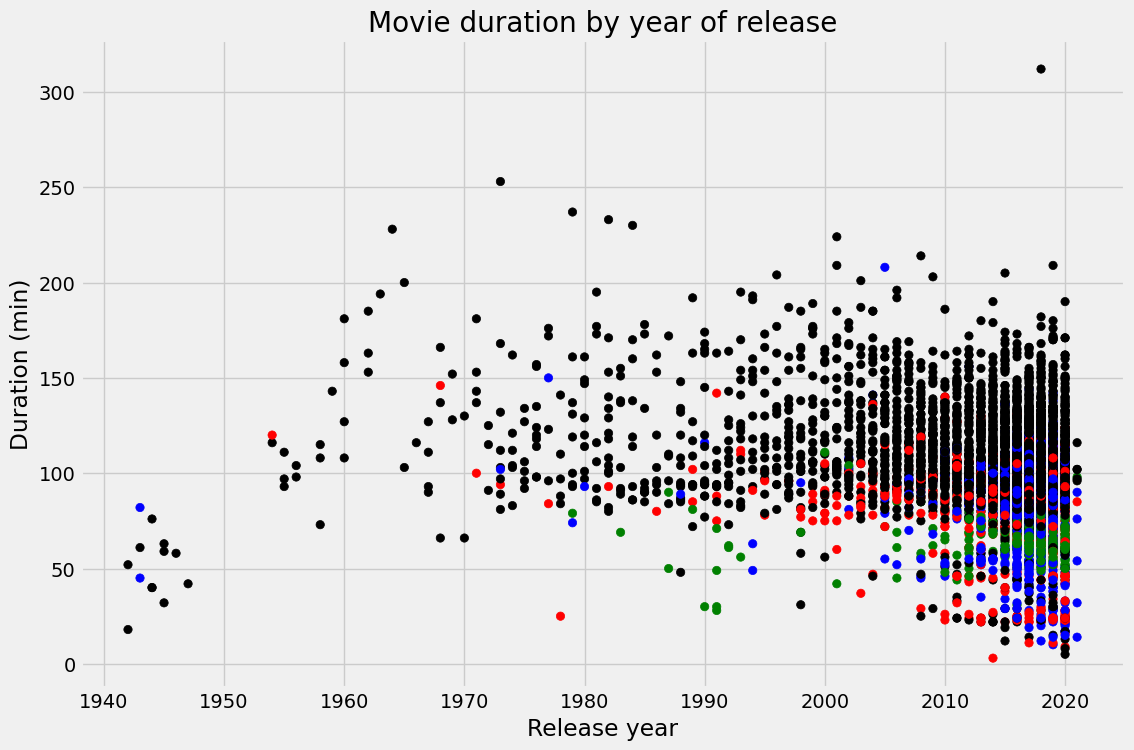

In [13]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset.release_year,netflix_movies_col_subset.duration, c = colors)

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

# Show the plot
plt.show()

## 10. What next?


In [14]:
# Are we certain that movies are getting shorter?
are_movies_getting_shorter = "According to my analysis, the certainty is common b/w 100-200 durations"
print(are_movies_getting_shorter)

According to my analysis, the certainty is common b/w 100-200 durations
